In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plte

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
product = "TATAMOTORS.NS"
startDate = "2019-01-01"
toDate = datetime.today().strftime('%Y-%m-%d')

In [4]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo(product, start=startDate, end=toDate)

[*********************100%***********************]  1 of 1 completed


In [5]:
import pandas as pd
from stockstats import StockDataFrame as Sdf

In [6]:
import yfinance as yf

dow_list = [product]
rows = []

for ticker in dow_list:
    stk_container = yf.Ticker(ticker)
    try:
        stk_info = stk_container.info
        print(stk_container)  # print the info
    except IndexError as e:
        print(f'{ticker}: {e}')  # print the ticker and the error
    print('\n')

yfinance.Ticker object <TATAMOTORS.NS>




In [7]:

# download dataframe
data_indice_nifty = pdr.get_data_yahoo("^NSEI", start=startDate, end=toDate)
data_indice_nifty_50  = pdr.get_data_yahoo(" ^NSEMDCP50", start=startDate, end=toDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
stock_tech = Sdf.retype(data)

market_nifty_tech = Sdf.retype(data_indice_nifty)
market_nifty_midcap_tech = Sdf.retype(data_indice_nifty_50)


In [9]:
stk_info

{'zip': '400093',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 78906,
 'longBusinessSummary': 'Tata Motors Limited designs, develops, manufactures, and sells a range of automotive vehicles. It offers passenger cars; sports utility vehicles; small commercial vehicles and pickup trucks; buses; and intermediate, light, medium, and heavy commercial vehicles, including trucks, tractors, tippers, multi-axle vehicles, pickups, dump trucks, tractor-trailers, mixers, and cargo vehicles, as well as related spare parts and accessories. The company also provides fully built solutions for applications, such as garbage compactors, containers, tankers, reefers, and diesel bowser, as well as electric vehicles. In addition, it offers information technology services, machine tools, and factory automation solutions; vehicle financing services; and engines for industrial and marine applications. The company provides its products under the Tata, Daewoo, Fiat, Jaguar, and Land Rover brands. It oper

In [10]:
data_stock_tech = {"volume_delta": 
# volume delta against previous day
stock_tech['volume_delta'],

# open delta against next 2 day
"open_2_d": stock_tech['open_2_d'],

# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
"open_-2_r" : stock_tech['open_-2_r'],

# CR indicator, including 5, 10, 20 days moving average
"cr" : stock_tech['cr'],
"cr-ma1" : stock_tech['cr-ma1'],
"cr-ma2" : stock_tech['cr-ma2'],
"cr-ma3" : stock_tech['cr-ma3'],

# volume max of three days ago, yesterday and two days later
"volume_-3,2,-1_max" : stock_tech['volume_-3,2,-1_max'],

# volume min between 3 days ago and tomorrow
"volume_-3~1_min" : stock_tech['volume_-3~1_min'],

# KDJ, default to 9 days
"kdjk" : stock_tech['kdjk'],
"kdjd" : stock_tech['kdjd'],
"kdjj" : stock_tech['kdjj'],


# 2 days simple moving average on open price
"open_2_sma" : stock_tech['open_2_sma'],

# MACD
"macd" : stock_tech['macd'],
# MACD signal line
"macds" : stock_tech['macds'],
# MACD histogram
"macdh" : stock_tech['macdh'],

# bolling, including upper band and lower band
"boll" : stock_tech['boll'],
"boll_ub": stock_tech['boll_ub'],
"boll_lb": stock_tech['boll_lb'],

# close price less than 10.0 in 5 days count
"close_10.0_le_5_c" : stock_tech['close_10.0_le_5_c'],

# CR MA2 cross up CR MA1 in 20 days count
"cr-ma2_xu_cr-ma1_20_c" : stock_tech['cr-ma2_xu_cr-ma1_20_c'],

# count forward(future) where close price is larger than 10
"close_10.0_ge_5_fc" : stock_tech['close_10.0_ge_5_fc'],

# 6 days RSI
"rsi_6" : stock_tech['rsi_6'],
# 12 days RSI
"rsi_12" : stock_tech['rsi_12'],

# 10 days WR
"wr_10" : stock_tech['wr_10'],
# 6 days WR
"wr_6" : stock_tech['wr_6'],

# CCI, default to 14 days
"cci" : stock_tech['cci'],
# 20 days CCI
"cci_20" : stock_tech['cci_20'],

# TR (true range)
"tr" : stock_tech['tr'],
# ATR (Average True Range)
"atr" : stock_tech['atr'],

# DMA, difference of 10 and 50 moving average
"dma" : stock_tech['dma'],

# DMI
# +DI, default to 14 days
"pdi" : stock_tech['pdi'],
# -DI, default to 14 days
"mdi" : stock_tech['mdi'],
# DX, default to 14 days of +DI and -DI
"dx" : stock_tech['dx'],
# ADX, 6 days SMA of DX, same as stock_tech['dx_6_ema']
"adx" : stock_tech['adx'],
# ADXR, 6 days SMA of ADX, same as stock_tech['adx_6_ema']
"adxr" : stock_tech['adxr'],

# TRIX, default to 12 days
"trix" : stock_tech['trix'],
    # TRIX based on the close price for a window of 3
"close_3_trix" : stock_tech['close_3_trix'],
# MATRIX is the simple moving average of TRIX
"trix_9_sma" : stock_tech['trix_9_sma'],
# TEMA, another implementation for triple ema
"tema" : stock_tech['tema'],
    # TEMA based on the close price for a window of 2
"close_2_tema" : stock_tech['close_2_tema'],

# VR, default to 26 days
"vr" : stock_tech['vr'],
# MAVR is the simple moving average of VR
"vr_6_sma" : stock_tech['vr_6_sma']}

In [11]:
data_market_nifty_tech = {"volume_delta": 
# volume delta against previous day
market_nifty_tech['volume_delta'],

# open delta against next 2 day
"open_2_d": market_nifty_tech['open_2_d'],

# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
"open_-2_r" : market_nifty_tech['open_-2_r'],

# CR indicator, including 5, 10, 20 days moving average
"cr" : market_nifty_tech['cr'],
"cr-ma1" : market_nifty_tech['cr-ma1'],
"cr-ma2" : market_nifty_tech['cr-ma2'],
"cr-ma3" : market_nifty_tech['cr-ma3'],

# volume max of three days ago, yesterday and two days later
"volume_-3,2,-1_max" : market_nifty_tech['volume_-3,2,-1_max'],

# volume min between 3 days ago and tomorrow
"volume_-3~1_min" : market_nifty_tech['volume_-3~1_min'],

# KDJ, default to 9 days
"kdjk" : market_nifty_tech['kdjk'],
"kdjd" : market_nifty_tech['kdjd'],
"kdjj" : market_nifty_tech['kdjj'],


# 2 days simple moving average on open price
"open_2_sma" : market_nifty_tech['open_2_sma'],

# MACD
"macd" : market_nifty_tech['macd'],
# MACD signal line
"macds" : market_nifty_tech['macds'],
# MACD histogram
"macdh" : market_nifty_tech['macdh'],

# bolling, including upper band and lower band
"boll" : market_nifty_tech['boll'],
"boll_ub": market_nifty_tech['boll_ub'],
"boll_lb": market_nifty_tech['boll_lb'],

# close price less than 10.0 in 5 days count
"close_10.0_le_5_c" : market_nifty_tech['close_10.0_le_5_c'],

# CR MA2 cross up CR MA1 in 20 days count
"cr-ma2_xu_cr-ma1_20_c" : market_nifty_tech['cr-ma2_xu_cr-ma1_20_c'],

# count forward(future) where close price is larger than 10
"close_10.0_ge_5_fc" : market_nifty_tech['close_10.0_ge_5_fc'],

# 6 days RSI
"rsi_6" : market_nifty_tech['rsi_6'],
# 12 days RSI
"rsi_12" : market_nifty_tech['rsi_12'],

# 10 days WR
"wr_10" : market_nifty_tech['wr_10'],
# 6 days WR
"wr_6" : market_nifty_tech['wr_6'],

# CCI, default to 14 days
"cci" : market_nifty_tech['cci'],
# 20 days CCI
"cci_20" : market_nifty_tech['cci_20'],

# TR (true range)
"tr" : market_nifty_tech['tr'],
# ATR (Average True Range)
"atr" : market_nifty_tech['atr'],

# DMA, difference of 10 and 50 moving average
"dma" : market_nifty_tech['dma'],

# DMI
# +DI, default to 14 days
"pdi" : market_nifty_tech['pdi'],
# -DI, default to 14 days
"mdi" : market_nifty_tech['mdi'],
# DX, default to 14 days of +DI and -DI
"dx" : market_nifty_tech['dx'],
# ADX, 6 days SMA of DX, same as market_nifty_tech['dx_6_ema']
"adx" : market_nifty_tech['adx'],
# ADXR, 6 days SMA of ADX, same as market_nifty_tech['adx_6_ema']
"adxr" : market_nifty_tech['adxr'],

# TRIX, default to 12 days
"trix" : market_nifty_tech['trix'],
    # TRIX based on the close price for a window of 3
"close_3_trix" : market_nifty_tech['close_3_trix'],
# MATRIX is the simple moving average of TRIX
"trix_9_sma" : market_nifty_tech['trix_9_sma'],
# TEMA, another implementation for triple ema
"tema" : market_nifty_tech['tema'],
    # TEMA based on the close price for a window of 2
"close_2_tema" : market_nifty_tech['close_2_tema'],

# VR, default to 26 days
"vr" : market_nifty_tech['vr'],
# MAVR is the simple moving average of VR
"vr_6_sma" : market_nifty_tech['vr_6_sma']}

In [12]:
data_market_nifty_midcap_tech = {"volume_delta": 
# volume delta against previous day
market_nifty_midcap_tech['volume_delta'],

# open delta against next 2 day
"open_2_d": market_nifty_midcap_tech['open_2_d'],

# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
"open_-2_r" : market_nifty_midcap_tech['open_-2_r'],

# CR indicator, including 5, 10, 20 days moving average
"cr" : market_nifty_midcap_tech['cr'],
"cr-ma1" : market_nifty_midcap_tech['cr-ma1'],
"cr-ma2" : market_nifty_midcap_tech['cr-ma2'],
"cr-ma3" : market_nifty_midcap_tech['cr-ma3'],

# volume max of three days ago, yesterday and two days later
"volume_-3,2,-1_max" : market_nifty_midcap_tech['volume_-3,2,-1_max'],

# volume min between 3 days ago and tomorrow
"volume_-3~1_min" : market_nifty_midcap_tech['volume_-3~1_min'],

# KDJ, default to 9 days
"kdjk" : market_nifty_midcap_tech['kdjk'],
"kdjd" : market_nifty_midcap_tech['kdjd'],
"kdjj" : market_nifty_midcap_tech['kdjj'],


# 2 days simple moving average on open price
"open_2_sma" : market_nifty_midcap_tech['open_2_sma'],

# MACD
"macd" : market_nifty_midcap_tech['macd'],
# MACD signal line
"macds" : market_nifty_midcap_tech['macds'],
# MACD histogram
"macdh" : market_nifty_midcap_tech['macdh'],

# bolling, including upper band and lower band
"boll" : market_nifty_midcap_tech['boll'],
"boll_ub": market_nifty_midcap_tech['boll_ub'],
"boll_lb": market_nifty_midcap_tech['boll_lb'],

# close price less than 10.0 in 5 days count
"close_10.0_le_5_c" : market_nifty_midcap_tech['close_10.0_le_5_c'],

# CR MA2 cross up CR MA1 in 20 days count
"cr-ma2_xu_cr-ma1_20_c" : market_nifty_midcap_tech['cr-ma2_xu_cr-ma1_20_c'],

# count forward(future) where close price is larger than 10
"close_10.0_ge_5_fc" : market_nifty_midcap_tech['close_10.0_ge_5_fc'],

# 6 days RSI
"rsi_6" : market_nifty_midcap_tech['rsi_6'],
# 12 days RSI
"rsi_12" : market_nifty_midcap_tech['rsi_12'],

# 10 days WR
"wr_10" : market_nifty_midcap_tech['wr_10'],
# 6 days WR
"wr_6" : market_nifty_midcap_tech['wr_6'],

# CCI, default to 14 days
"cci" : market_nifty_midcap_tech['cci'],
# 20 days CCI
"cci_20" : market_nifty_midcap_tech['cci_20'],

# TR (true range)
"tr" : market_nifty_midcap_tech['tr'],
# ATR (Average True Range)
"atr" : market_nifty_midcap_tech['atr'],

# DMA, difference of 10 and 50 moving average
"dma" : market_nifty_midcap_tech['dma'],

# DMI
# +DI, default to 14 days
"pdi" : market_nifty_midcap_tech['pdi'],
# -DI, default to 14 days
"mdi" : market_nifty_midcap_tech['mdi'],
# DX, default to 14 days of +DI and -DI
"dx" : market_nifty_midcap_tech['dx'],
# ADX, 6 days SMA of DX, same as market_nifty_midcap_tech['dx_6_ema']
"adx" : market_nifty_midcap_tech['adx'],
# ADXR, 6 days SMA of ADX, same as market_nifty_midcap_tech['adx_6_ema']
"adxr" : market_nifty_midcap_tech['adxr'],

# TRIX, default to 12 days
"trix" : market_nifty_midcap_tech['trix'],
    # TRIX based on the close price for a window of 3
"close_3_trix" : market_nifty_midcap_tech['close_3_trix'],
# MATRIX is the simple moving average of TRIX
"trix_9_sma" : market_nifty_midcap_tech['trix_9_sma'],
# TEMA, another implementation for triple ema
"tema" : market_nifty_midcap_tech['tema'],
    # TEMA based on the close price for a window of 2
"close_2_tema" : market_nifty_midcap_tech['close_2_tema'],

# VR, default to 26 days
"vr" : market_nifty_midcap_tech['vr'],
# MAVR is the simple moving average of VR
"vr_6_sma" : market_nifty_midcap_tech['vr_6_sma']}

In [13]:
df_stock_tech = pd.concat(data_stock_tech, 
               axis = 1)
df_market_nifty_midcap_tech = pd.concat(data_market_nifty_tech, 
               axis = 1)

df_market_nifty_midcap_tech = pd.concat(data_market_nifty_midcap_tech, 
               axis = 1)

In [14]:
df_market_nifty_midcap_tech

,volume_delta,open_2_d,open_-2_r,cr,cr-ma1,cr-ma2,cr-ma3,"volume_-3,2,-1_max",volume_-3~1_min,kdjk,...,dx,adx,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,100.399902,NaN,NaN,NaN,NaN,NaN,0.0,0.0,37.300175,...,NaN,NaN,NaN,NaN,NaN,NaN,4860.049805,4860.049805,NaN,NaN
2019-01-03,0.0,-16.049805,NaN,2.061742,NaN,NaN,NaN,0.0,0.0,26.656975,...,100.000000,100.000000,100.000000,-0.176746,-0.329518,-0.176746,4809.459187,4806.844528,NaN,NaN
2019-01-04,0.0,-37.300293,-2.041665,19.890831,NaN,NaN,NaN,179900.0,0.0,31.379505,...,100.000000,100.000000,100.000000,-0.079863,-0.084197,-0.128305,4838.448339,4845.140040,NaN,NaN
2019-01-07,0.0,-0.600098,0.329988,63.944414,NaN,NaN,NaN,0.0,0.0,34.844009,...,21.783705,64.838546,84.193475,-0.040312,0.006486,-0.098974,4847.960591,4850.155960,NaN,NaN
2019-01-08,179900.0,-8.500000,0.774323,59.139733,2.061742,NaN,NaN,0.0,0.0,40.065049,...,26.749361,50.126170,71.034595,-0.015351,0.073792,-0.078068,4860.892179,4862.620003,inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,0.0,27.250000,1.208056,138.793585,210.469586,355.285289,318.104212,0.0,0.0,69.417388,...,3.304180,16.765056,31.193700,0.376341,0.299796,0.528341,5815.504889,5817.869664,inf,NaN
2020-12-30,0.0,-174.899902,1.045706,138.020151,173.678451,320.275938,327.114589,0.0,0.0,72.672973,...,3.304180,12.919091,25.972383,0.351813,0.337448,0.494279,5835.798110,5830.417881,inf,NaN
2020-12-31,0.0,-222.250000,-0.465331,135.534202,147.817864,286.211860,334.178449,0.0,0.0,79.199238,...,11.360917,12.473899,22.115673,0.333197,0.393157,0.459601,5871.146749,5871.192011,inf,NaN


In [15]:
final_data  = df_stock_tech

In [16]:
final_data = final_data.join(df_market_nifty_midcap_tech, on= "Date",  rsuffix='_nifty')

In [17]:
final_data = final_data.join(df_market_nifty_midcap_tech, on= "Date",  rsuffix='_nifty_midcap')

In [18]:
final_data

,volume_delta,open_2_d,open_-2_r,cr,cr-ma1,cr-ma2,cr-ma3,"volume_-3,2,-1_max",volume_-3~1_min,kdjk,...,dx_nifty_midcap,adx_nifty_midcap,adxr_nifty_midcap,trix_nifty_midcap,close_3_trix_nifty_midcap,trix_9_sma_nifty_midcap,tema_nifty_midcap,close_2_tema_nifty_midcap,vr_nifty_midcap,vr_6_sma_nifty_midcap
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,9321842.0,6715543.0,58.045959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,6694561.0,1.600006,NaN,0.000000,NaN,NaN,NaN,17650435.0,6715543.0,41.654313,...,NaN,NaN,NaN,NaN,NaN,NaN,4860.049805,4860.049805,NaN,NaN
2019-01-03,-4088262.0,-4.199997,-2.593660,7.692236,NaN,NaN,NaN,21438351.0,6715543.0,31.249388,...,100.000000,100.000000,100.000000,-0.176746,-0.329518,-0.176746,4809.459187,4806.844528,NaN,NaN
2019-01-04,8328593.0,-7.100006,-0.937870,59.749472,NaN,NaN,NaN,20128985.0,6715543.0,42.261485,...,100.000000,100.000000,100.000000,-0.079863,-0.084197,-0.128305,4838.448339,4845.140040,NaN,NaN
2019-01-07,3787916.0,-8.300003,2.485205,142.754882,0.000000,NaN,NaN,17650435.0,9321842.0,54.255766,...,21.783705,64.838546,84.193475,-0.040312,0.006486,-0.098974,4847.960591,4850.155960,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,-32741926.0,-1.849991,1.807061,123.686271,147.522916,226.379042,266.821223,73831319.0,38576159.0,76.421336,...,3.304180,12.919091,25.972383,0.351813,0.337448,0.494279,5835.798110,5830.417881,inf,NaN
2020-12-31,10402151.0,-6.949997,-1.623197,126.634058,133.100207,207.853380,267.490630,98012135.0,27334421.0,79.451504,...,11.360917,12.473899,22.115673,0.333197,0.393157,0.459601,5871.146749,5871.192011,inf,NaN
2021-01-01,-21643889.0,-2.150009,1.010372,122.264473,128.720044,193.634620,266.188717,75752593.0,27334421.0,84.253762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
final_data = stock_tech.join(final_data, on= "Date",  rsuffix='_technical')

In [20]:
final_data

,open,high,low,close,adj close,volume,volume_delta,open_2_s,open_2_d,open_-2_r,...,dx_nifty_midcap,adx_nifty_midcap,adxr_nifty_midcap,trix_nifty_midcap,close_3_trix_nifty_midcap,trix_9_sma_nifty_midcap,tema_nifty_midcap,close_2_tema_nifty_midcap,vr_nifty_midcap,vr_6_sma_nifty_midcap
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543,NaN,169.000000,4.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104,6694561.0,169.000000,1.600006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4860.049805,4860.049805,NaN,NaN
2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842,-4088262.0,173.199997,-4.199997,-2.593660,...,100.000000,100.000000,100.000000,-0.176746,-0.329518,-0.176746,4809.459187,4806.844528,NaN,NaN
2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435,8328593.0,176.100006,-7.100006,-0.937870,...,100.000000,100.000000,100.000000,-0.079863,-0.084197,-0.128305,4838.448339,4845.140040,NaN,NaN
2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351,3787916.0,181.500000,-8.300003,2.485205,...,21.783705,64.838546,84.193475,-0.040312,0.006486,-0.098974,4847.960591,4850.155960,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,183.100006,185.399994,180.399994,184.149994,184.149994,38576159,-32741926.0,184.949997,-1.849991,1.807061,...,3.304180,12.919091,25.972383,0.351813,0.337448,0.494279,5835.798110,5830.417881,inf,NaN
2020-12-31,184.850006,187.500000,182.800003,183.850006,183.850006,48978310,10402151.0,191.800003,-6.949997,-1.623197,...,11.360917,12.473899,22.115673,0.333197,0.393157,0.459601,5871.146749,5871.192011,inf,NaN
2021-01-01,184.949997,187.000000,184.500000,186.500000,186.500000,27334421,-21643889.0,187.100006,-2.150009,1.010372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
final_data.to_csv(product+"_Stock_technical.csv")

In [22]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(df_stock_tech, title='Divis Labs Technical Profiling Report')
# profile

In [23]:
final_data['Date'] = final_data.index


In [24]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(df_stock_tech, target_feat ='close')
# my_report.show_html()
final_data.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'volume_delta',
       'open_2_s', 'open_2_d', 'open_-2_r',
       ...
       'adx_nifty_midcap', 'adxr_nifty_midcap', 'trix_nifty_midcap',
       'close_3_trix_nifty_midcap', 'trix_9_sma_nifty_midcap',
       'tema_nifty_midcap', 'close_2_tema_nifty_midcap', 'vr_nifty_midcap',
       'vr_6_sma_nifty_midcap', 'Date'],
      dtype='object', length=221)

In [30]:
test_data = final_data
test_data.reset_index(drop=True)
cols = ['open', 'high', 'low', 'close', 'adj close', 'volume', 'volume_delta', 'open_2_s', 'open_2_d', 'open_-2_r', 'middle', 'cr', 'cr-ma1', 'cr-ma2', 'cr-ma3', 'volume_-3_s', 'volume_-1_s', 'volume_2_s', 'volume_-3,2,-1_max', 'volume_-2_s', 'volume_0_s', 'volume_1_s', 'volume_-3~1_min', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'open_2_sma', 'macd', 'macds', 'macdh', 'close_20_sma', 'close_20_mstd', 'boll', 'boll_ub', 'boll_lb', 'close_10.0_le', 'close_10.0_le_5_c', 'cr-ma1_20_c', 'cr-ma2_xu_cr-ma1_20_c', 'close_10.0_ge', 'close_10.0_ge_5_fc', 'close_-1_s', 'close_-1_d', 'rs_6', 'rsi_6', 'rs_12', 'rsi_12', 'wr_10', 'wr_6', 'middle_14_sma', 'cci', 'middle_20_sma', 'cci_20', 'tr', 'atr', 'close_10_sma', 'close_50_sma', 'dma', 'high_delta', 'um', 'low_delta', 'dm', 'pdm', 'pdm_14_ema', 'pdm_14', 'atr_14', 'pdi_14', 'pdi', 'mdm', 'mdm_14_ema', 'mdm_14', 'mdi_14', 'mdi', 'dx_14', 'dx', 'dx_6_ema', 'adx', 'adx_6_ema', 'adxr', 'trix', 'close_3_trix', 'trix_9_sma', 'tema', 'close_2_tema', 'change', 'vr', 'vr_6_sma', 'volume_delta_technical', 'open_2_d_technical', 'open_-2_r_technical', 'cr_technical', 'cr-ma1_technical', 'cr-ma2_technical', 'cr-ma3_technical', 'volume_-3,2,-1_max_technical', 'volume_-3~1_min_technical', 'kdjk_technical', 'kdjd_technical', 'kdjj_technical', 'open_2_sma_technical', 'macd_technical', 'macds_technical', 'macdh_technical', 'boll_technical', 'boll_ub_technical', 'boll_lb_technical', 'close_10.0_le_5_c_technical', 'cr-ma2_xu_cr-ma1_20_c_technical', 'close_10.0_ge_5_fc_technical', 'rsi_6_technical', 'rsi_12_technical', 'wr_10_technical', 'wr_6_technical', 'cci_technical', 'cci_20_technical', 'tr_technical', 'atr_technical', 'dma_technical', 'pdi_technical', 'mdi_technical', 'dx_technical', 'adx_technical', 'adxr_technical', 'trix_technical', 'close_3_trix_technical', 'trix_9_sma_technical', 'tema_technical', 'close_2_tema_technical', 'vr_technical', 'vr_6_sma_technical', 'volume_delta_nifty', 'open_2_d_nifty', 'open_-2_r_nifty', 'cr_nifty', 'cr-ma1_nifty', 'cr-ma2_nifty', 'cr-ma3_nifty', 'volume_-3,2,-1_max_nifty', 'volume_-3~1_min_nifty', 'kdjk_nifty', 'kdjd_nifty', 'kdjj_nifty', 'open_2_sma_nifty', 'macd_nifty', 'macds_nifty', 'macdh_nifty', 'boll_nifty', 'boll_ub_nifty', 'boll_lb_nifty', 'close_10.0_le_5_c_nifty', 'cr-ma2_xu_cr-ma1_20_c_nifty', 'close_10.0_ge_5_fc_nifty', 'rsi_6_nifty', 'rsi_12_nifty', 'wr_10_nifty', 'wr_6_nifty', 'cci_nifty', 'cci_20_nifty', 'tr_nifty', 'atr_nifty', 'dma_nifty', 'pdi_nifty', 'mdi_nifty', 'dx_nifty', 'adx_nifty', 'adxr_nifty', 'trix_nifty', 'close_3_trix_nifty', 'trix_9_sma_nifty', 'tema_nifty', 'close_2_tema_nifty', 'vr_nifty', 'vr_6_sma_nifty', 'volume_delta_nifty_midcap', 'open_2_d_nifty_midcap', 'open_-2_r_nifty_midcap', 'cr_nifty_midcap', 'cr-ma1_nifty_midcap', 'cr-ma2_nifty_midcap', 'cr-ma3_nifty_midcap', 'volume_-3,2,-1_max_nifty_midcap', 'volume_-3~1_min_nifty_midcap', 'kdjk_nifty_midcap', 'kdjd_nifty_midcap', 'kdjj_nifty_midcap', 'open_2_sma_nifty_midcap', 'macd_nifty_midcap', 'macds_nifty_midcap', 'macdh_nifty_midcap', 'boll_nifty_midcap', 'boll_ub_nifty_midcap', 'boll_lb_nifty_midcap', 'close_10.0_le_5_c_nifty_midcap', 'cr-ma2_xu_cr-ma1_20_c_nifty_midcap', 'close_10.0_ge_5_fc_nifty_midcap', 'rsi_6_nifty_midcap', 'rsi_12_nifty_midcap', 'wr_10_nifty_midcap', 'wr_6_nifty_midcap', 'cci_nifty_midcap', 'cci_20_nifty_midcap', 'tr_nifty_midcap', 'atr_nifty_midcap', 'dma_nifty_midcap', 'pdi_nifty_midcap', 'mdi_nifty_midcap', 'dx_nifty_midcap', 'adx_nifty_midcap', 'adxr_nifty_midcap', 'trix_nifty_midcap', 'close_3_trix_nifty_midcap', 'trix_9_sma_nifty_midcap', 'tema_nifty_midcap', 'close_2_tema_nifty_midcap', 'vr_nifty_midcap', 'vr_6_sma_nifty_midcap', 'Date']
x_train = test_data[0:int(len(test_data)*0.7)]
x_train = x_train.drop(['close'], axis=1)
x_train = x_train.drop(['Date'], axis=1)

y_train = test_data[0:int(len(test_data)*0.7)]
y_train = y_train.filter(['close'])

x_test = test_data[int(len(test_data)*0.7):]
x_test = x_test.drop(['close'], axis=1)
x_test = x_test.drop(['Date'], axis=1)

y_test = test_data[int(len(test_data)*0.7):]
y_test = y_test.filter(['close'])

x_test.shape

(149, 219)

In [38]:
x_test = pd.DataFrame(x_test).fillna(0)
x_train = pd.DataFrame(x_train).fillna(0)

In [49]:
x_train = x_train.replace([np.inf, -np.inf], 0)
x_test = x_test.replace([np.inf, -np.inf], 0)


In [51]:
rf = RandomForestRegressor(max_depth=3,min_samples_leaf=2,random_state=0,n_estimators=90,criterion="mse")
rf.fit(x_train,y_train)

mse = []
y_pred = rf.predict(x_test)


/Users/vishalnigam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [73]:
for a,b in zip(y_pred,y_test):
    print(a,b)
    mse.append(np.square(y_pred-y_test))
    
print('>>> The model"s mse is %5f'%(np.mean(mse)))

rmse=np.sqrt(np.mean(mse))
print('>>> The model"s rmse is %5f'%(rmse))

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('>>> The model"s r2 is %5f'%(r2))


[98.74891163] close
>>> The model"s mse is 34.057939
>>> The model"s rmse is 5.835918
>>> The model"s r2 is 0.954461


Text(0, 0.5, 'close')

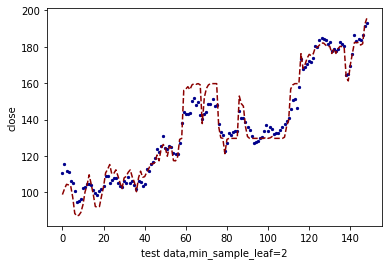

In [53]:

plt.figure()
plt.plot(np.arange(len(x_test)),y_pred,color = 'darkred',ls ='--')
# plt.scatter(np.arange(len(x_test)),y_test,c = 'darkblue',s = 5)
plt.xlabel('test data,min_sample_leaf=2')
plt.ylabel('close')    


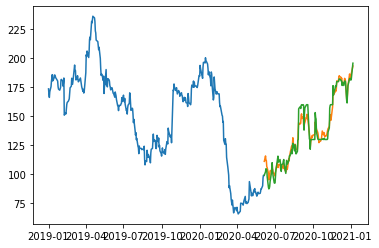

In [58]:
#for plotting
import matplotlib.pyplot as plt
train = test_data[0:int(len(test_data)*0.7)]
train = train.filter(['close'])
valid = test_data[int(len(test_data)*0.7):]
valid = valid.filter(['close'])

valid['Predictions'] = y_pred
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])